In [7]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [8]:
def file_opener(json_file):
    file_to_open = data_folder / json_file
    f = open(file_to_open)
    data = json.load(f)

    data.keys()

    a = data['Staff Review of the Economic Situation']
    b = data['Staff Review of the Financial Situation']
    c = data['Staff Economic Outlook']
    d = data["Participants' Views on Current Economic Conditions and the Economic Outlook"]
    #e = data['Committee Policy Action']

    a.extend(b+c+d)
    
    total = ''.join(a)

    return a, b, c, d, total

In [9]:
def trigrams(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(["governors", "board", "federal", "reserve"])
    words =[word.lower() for word in words if word.isalpha() if word not in stopwords]
    trigrams = nltk.collocations.TrigramAssocMeasures()
    trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(words)
    trigram_freq = trigramFinder.ngram_fd.items()
    trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
    
    return trigramFreqTable

In [10]:
def trigrams_progress():
    staff_review_econ = ''.join(a)
    staff_review_financial = ''.join(b)
    staff_econ_outlook = ''.join(c)
    participants_views = ''.join(d)
    #policy_action = ''.join(e)
    sample = ''.join(total)

    df_staff_review_econ = trigrams(staff_review_econ)
    df_staff_review_financial = trigrams(staff_review_financial)
    df_staff_econ_outlook = trigrams(staff_econ_outlook)
    df_participants_views = trigrams(participants_views)
    #df_policy_action = trigrams(policy_action)
    df_sample = trigrams(sample)

    return df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample

In [11]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.ticker import MaxNLocator

def trigrams_plot():
    df = df_sample.head(20).reset_index(drop=True)
    #df
    ax2 = df.plot.bar(x='trigram', y='freq', rot=0, figsize=(20,10), color='#32B5C9').set_title('FOMC minutes Trigram')
    plt.xticks(rotation=45, ha='right')

    # initialize a figure
    fig=plt.figure(figsize=(18, 12))
    plt.subplots_adjust(hspace = 1.2)
    """
    # Do a 2x2 chart
    ax1 = fig.add_subplot(221)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    df_staff_review_econ.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False).set_title('staff review econ')
    plt.xticks(rotation=45, ha='right')

    ax2 = fig.add_subplot(222)
    df_staff_review_financial.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('staff review finance')
    plt.xticks(rotation=45, ha='right')

    ax3 = fig.add_subplot(223)
    ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
    df_staff_econ_outlook.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('staff econ outlook')
    plt.xticks(rotation=45, ha='right')

    ax4 = fig.add_subplot(224)
    df_participants_views.head(5).plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="grey").set_title('participants view')
    plt.xticks(rotation=45, ha='right')
    """ 
    
    

['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json', '20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json', '20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json', '20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json', '20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']
[                                 trigram  freq
41   (

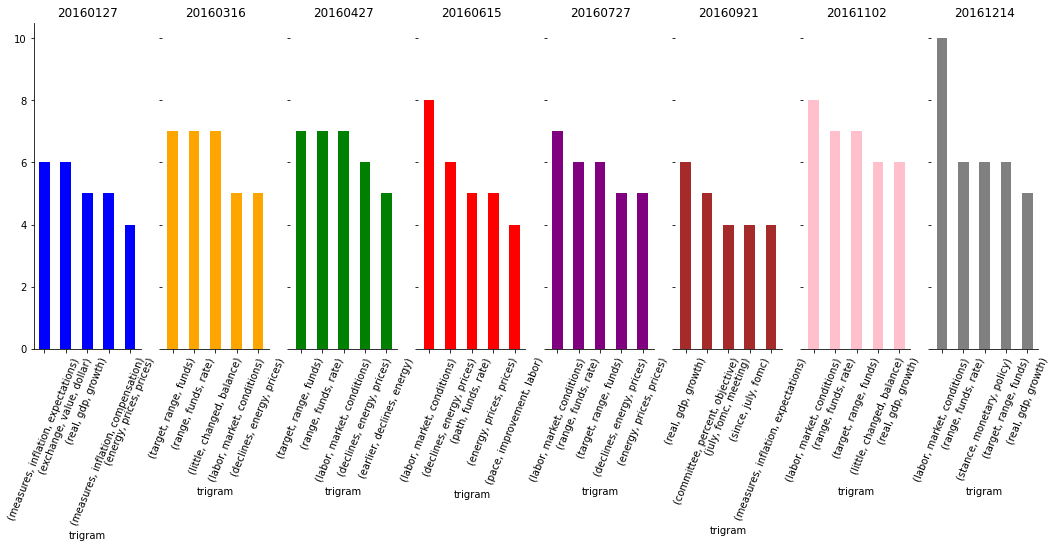

In [18]:
from pathlib import Path
import json

path_to_json = r'C:\Users\Howoo\Data_analysis\get_data\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

json_files = ['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json']

lst = []

for i in json_files:

    data_folder = Path(r'C:\Users\Howoo\Data_analysis\get_data\data')
    file_to_open = data_folder / i

    f = open(file_to_open)
    data = json.load(f)

    a, b, c, d, total = file_opener(file_to_open)

    df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample = trigrams_progress()
    #trigrams_plot()
    
    #df_sample.head(5)
    lst.append(df_sample.head(5))
    #empty_dataframe.concat([]), ]

print(lst)
# initialize a figure
fig, axes = plt.subplots(1, 8, figsize=(18, 6), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes
lst[0].plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False, color = "blue").set_title('20160127')
lst[1].plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('20160316')
lst[2].plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('20160427')
lst[3].plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="red").set_title('20160615')
lst[4].plot(x='trigram', y='freq', kind='bar', ax=ax5, legend=False, color="purple").set_title('20160727')
lst[5].plot(x='trigram', y='freq', kind='bar', ax=ax6, legend=False, color="brown").set_title('20160921')
lst[6].plot(x='trigram', y='freq', kind='bar', ax=ax7, legend=False, color="pink").set_title('20161102')
lst[7].plot(x='trigram', y='freq', kind='bar', ax=ax8, legend=False, color="gray").set_title('20161214')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 68)
    for side in ('right', 'top', 'left'):
        if (ax == ax1) and (side == 'left'):
            continue
        else:
            sp = ax.spines[side]
            sp.set_visible(False)

['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json', '20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json', '20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json', '20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json', '20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']
[                          trigram  freq
22    (labor,

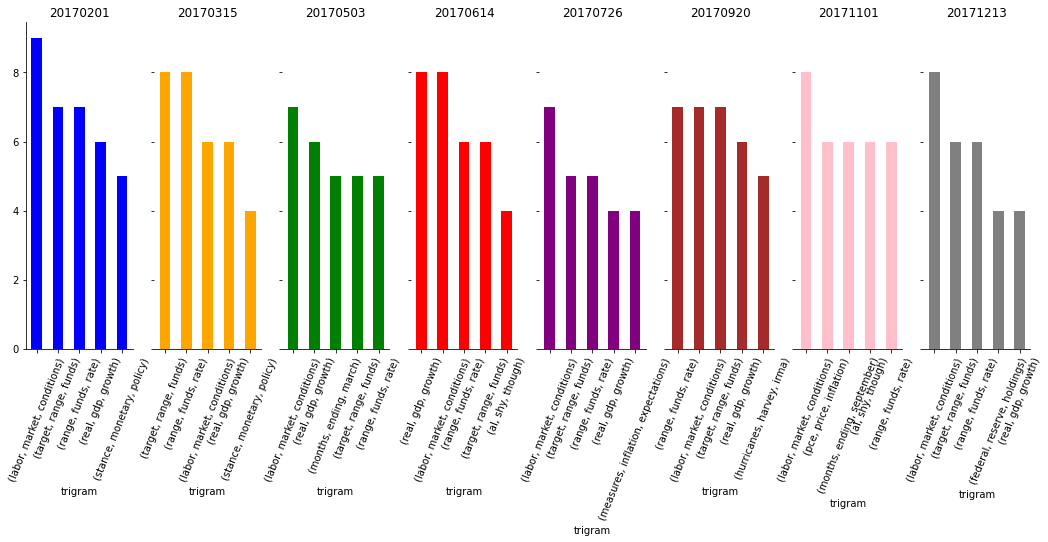

In [27]:
from pathlib import Path
import json

path_to_json = r'C:\Users\Howoo\Data_analysis\get_data\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

json_files = ['20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json']

lst = []

for i in json_files:

    data_folder = Path(r'C:\Users\Howoo\Data_analysis\get_data\data')
    file_to_open = data_folder / i

    f = open(file_to_open)
    data = json.load(f)

    a, b, c, d, total = file_opener(file_to_open)

    df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample = trigrams_progress()
    #trigrams_plot()
    
    #df_sample.head(5)
    lst.append(df_sample.head(5))
    #empty_dataframe.concat([]), ]

print(lst)
# initialize a figure
fig, axes = plt.subplots(1, 8, figsize=(18, 6), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes
lst[0].plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False, color = "blue").set_title('20170201')
lst[1].plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('20170315')
lst[2].plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('20170503')
lst[3].plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="red").set_title('20170614')
lst[4].plot(x='trigram', y='freq', kind='bar', ax=ax5, legend=False, color="purple").set_title('20170726')
lst[5].plot(x='trigram', y='freq', kind='bar', ax=ax6, legend=False, color="brown").set_title('20170920')
lst[6].plot(x='trigram', y='freq', kind='bar', ax=ax7, legend=False, color="pink").set_title('20171101')
lst[7].plot(x='trigram', y='freq', kind='bar', ax=ax8, legend=False, color="gray").set_title('20171213')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 68)
    for side in ('right', 'top', 'left'):
        if (ax == ax1) and (side == 'left'):
            continue
        else:
            sp = ax.spines[side]
            sp.set_visible(False)

['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json', '20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json', '20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json', '20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json', '20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']
[                                 trigram  freq
10    

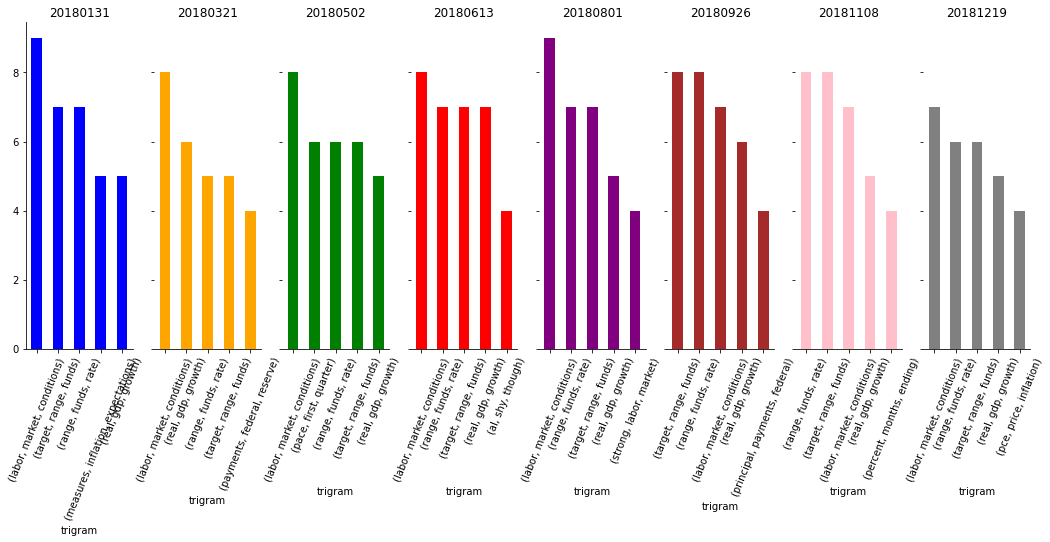

In [28]:
from pathlib import Path
import json

path_to_json = r'C:\Users\Howoo\Data_analysis\get_data\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

json_files = ['20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json']

lst = []

for i in json_files:

    data_folder = Path(r'C:\Users\Howoo\Data_analysis\get_data\data')
    file_to_open = data_folder / i

    f = open(file_to_open)
    data = json.load(f)

    a, b, c, d, total = file_opener(file_to_open)

    df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample = trigrams_progress()
    #trigrams_plot()
    
    #df_sample.head(5)
    lst.append(df_sample.head(5))
    #empty_dataframe.concat([]), ]

print(lst)
# initialize a figure
fig, axes = plt.subplots(1, 8, figsize=(18, 6), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes
lst[0].plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False, color = "blue").set_title('20180131')
lst[1].plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('20180321')
lst[2].plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('20180502')
lst[3].plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="red").set_title('20180613')
lst[4].plot(x='trigram', y='freq', kind='bar', ax=ax5, legend=False, color="purple").set_title('20180801')
lst[5].plot(x='trigram', y='freq', kind='bar', ax=ax6, legend=False, color="brown").set_title('20180926')
lst[6].plot(x='trigram', y='freq', kind='bar', ax=ax7, legend=False, color="pink").set_title('20181108')
lst[7].plot(x='trigram', y='freq', kind='bar', ax=ax8, legend=False, color="gray").set_title('20181219')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 68)
    for side in ('right', 'top', 'left'):
        if (ax == ax1) and (side == 'left'):
            continue
        else:
            sp = ax.spines[side]
            sp.set_visible(False)

['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json', '20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json', '20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json', '20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json', '20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']
[                           trigram  freq
799         

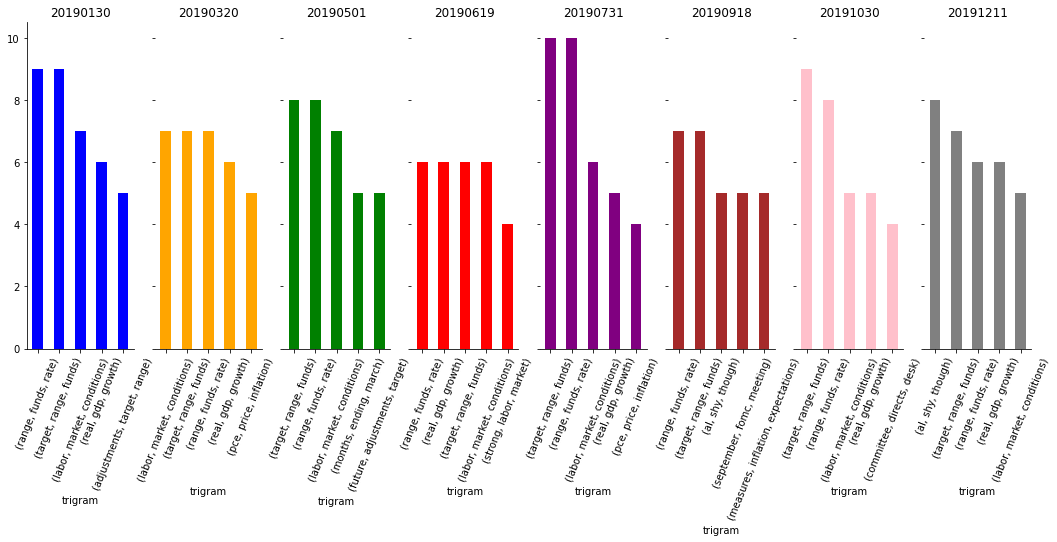

In [29]:
from pathlib import Path
import json

path_to_json = r'C:\Users\Howoo\Data_analysis\get_data\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

json_files = ['20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json']

lst = []

for i in json_files:

    data_folder = Path(r'C:\Users\Howoo\Data_analysis\get_data\data')
    file_to_open = data_folder / i

    f = open(file_to_open)
    data = json.load(f)

    a, b, c, d, total = file_opener(file_to_open)

    df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample = trigrams_progress()
    #trigrams_plot()
    
    #df_sample.head(5)
    lst.append(df_sample.head(5))
    #empty_dataframe.concat([]), ]

print(lst)
# initialize a figure
fig, axes = plt.subplots(1, 8, figsize=(18, 6), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes
lst[0].plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False, color = "blue").set_title('20190130')
lst[1].plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('20190320')
lst[2].plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('20190501')
lst[3].plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="red").set_title('20190619')
lst[4].plot(x='trigram', y='freq', kind='bar', ax=ax5, legend=False, color="purple").set_title('20190731')
lst[5].plot(x='trigram', y='freq', kind='bar', ax=ax6, legend=False, color="brown").set_title('20190918')
lst[6].plot(x='trigram', y='freq', kind='bar', ax=ax7, legend=False, color="pink").set_title('20191030')
lst[7].plot(x='trigram', y='freq', kind='bar', ax=ax8, legend=False, color="gray").set_title('20191211')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 68)
    for side in ('right', 'top', 'left'):
        if (ax == ax1) and (side == 'left'):
            continue
        else:
            sp = ax.spines[side]
            sp.set_visible(False)

['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json', '20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json', '20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json', '20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json', '20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']
[                                 trigram  freq
785   

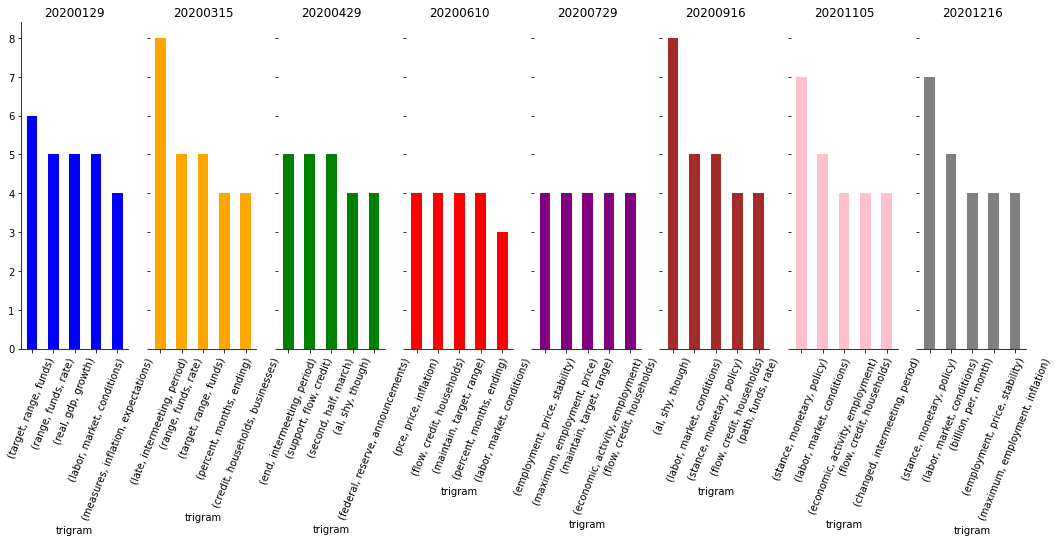

In [30]:
from pathlib import Path
import json

path_to_json = r'C:\Users\Howoo\Data_analysis\get_data\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

json_files = ['20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json']

lst = []

for i in json_files:

    data_folder = Path(r'C:\Users\Howoo\Data_analysis\get_data\data')
    file_to_open = data_folder / i

    f = open(file_to_open)
    data = json.load(f)

    a, b, c, d, total = file_opener(file_to_open)

    df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample = trigrams_progress()
    #trigrams_plot()
    
    #df_sample.head(5)
    lst.append(df_sample.head(5))
    #empty_dataframe.concat([]), ]

print(lst)
# initialize a figure
fig, axes = plt.subplots(1, 8, figsize=(18, 6), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes
lst[0].plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False, color = "blue").set_title('20200129')
lst[1].plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('20200315')
lst[2].plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('20200429')
lst[3].plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="red").set_title('20200610')
lst[4].plot(x='trigram', y='freq', kind='bar', ax=ax5, legend=False, color="purple").set_title('20200729')
lst[5].plot(x='trigram', y='freq', kind='bar', ax=ax6, legend=False, color="brown").set_title('20200916')
lst[6].plot(x='trigram', y='freq', kind='bar', ax=ax7, legend=False, color="pink").set_title('20201105')
lst[7].plot(x='trigram', y='freq', kind='bar', ax=ax8, legend=False, color="gray").set_title('20201216')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 68)
    for side in ('right', 'top', 'left'):
        if (ax == ax1) and (side == 'left'):
            continue
        else:
            sp = ax.spines[side]
            sp.set_visible(False)

['20160127.htm.json', '20160316.htm.json', '20160427.htm.json', '20160615.htm.json', '20160727.htm.json', '20160921.htm.json', '20161102.htm.json', '20161214.htm.json', '20170201.htm.json', '20170315.htm.json', '20170503.htm.json', '20170614.htm.json', '20170726.htm.json', '20170920.htm.json', '20171101.htm.json', '20171213.htm.json', '20180131.htm.json', '20180321.htm.json', '20180502.htm.json', '20180613.htm.json', '20180801.htm.json', '20180926.htm.json', '20181108.htm.json', '20181219.htm.json', '20190130.htm.json', '20190320.htm.json', '20190501.htm.json', '20190619.htm.json', '20190731.htm.json', '20190918.htm.json', '20191030.htm.json', '20191211.htm.json', '20200129.htm.json', '20200315.htm.json', '20200429.htm.json', '20200610.htm.json', '20200729.htm.json', '20200916.htm.json', '20201105.htm.json', '20201216.htm.json', '20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']
[                               trigram  freq
2085    

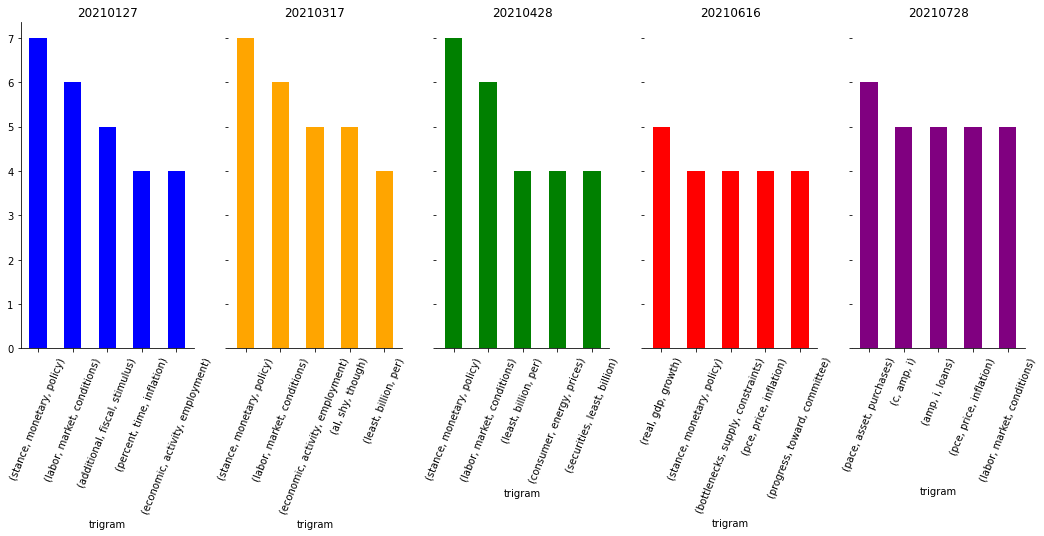

In [25]:
from pathlib import Path
import json

path_to_json = r'C:\Users\Howoo\Data_analysis\get_data\data'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

json_files = ['20210127.htm.json', '20210317.htm.json', '20210428.htm.json', '20210616.htm.json', '20210728.htm.json']

lst = []

for i in json_files:

    data_folder = Path(r'C:\Users\Howoo\Data_analysis\get_data\data')
    file_to_open = data_folder / i

    f = open(file_to_open)
    data = json.load(f)

    a, b, c, d, total = file_opener(file_to_open)

    df_staff_review_econ, df_staff_review_financial, df_staff_econ_outlook, df_participants_views, df_sample = trigrams_progress()
    #trigrams_plot()
    
    #df_sample.head(5)
    lst.append(df_sample.head(5))
    #empty_dataframe.concat([]), ]

print(lst)
# initialize a figure
fig, axes = plt.subplots(1, 5, figsize=(18, 6), sharey=True)
ax1, ax2, ax3, ax4, ax5 = axes
lst[0].plot(x='trigram', y='freq', kind='bar', ax=ax1, legend=False, color = "blue").set_title('20210127')
lst[1].plot(x='trigram', y='freq', kind='bar', ax=ax2, legend=False, color="orange").set_title('20210317')
lst[2].plot(x='trigram', y='freq', kind='bar', ax=ax3, legend=False, color="green").set_title('20210428')
lst[3].plot(x='trigram', y='freq', kind='bar', ax=ax4, legend=False, color="red").set_title('20210616')
lst[4].plot(x='trigram', y='freq', kind='bar', ax=ax5, legend=False, color="purple").set_title('20210728')

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 68)
    for side in ('right', 'top', 'left'):
        if (ax == ax1) and (side == 'left'):
            continue
        else:
            sp = ax.spines[side]
            sp.set_visible(False)